In [35]:
from collections import defaultdict

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams["figure.dpi"] = 300

In [36]:
datasets = ["cifar10", "cifar100", "svhn"]
dataname = "batch_pl_cov"
df_s = [
    pd.read_parquet(f"df_{dataname}_{dataset}.parquet").reset_index()
    for dataset in datasets
]

In [37]:
df_s[0]

,index,step,tag,value,method,seed,dataset,accu
0,111000,0,batch_pl_cov,0.000000,fixmatch,0,cifar10,False
1,111200,200,batch_pl_cov,13.616072,fixmatch,0,cifar10,False
2,111400,400,batch_pl_cov,25.669643,fixmatch,0,cifar10,False
3,111600,600,batch_pl_cov,27.678573,fixmatch,0,cifar10,False
4,111800,800,batch_pl_cov,27.678573,fixmatch,0,cifar10,False
...,...,...,...,...,...,...,...,...
1355,147000,36000,batch_pl_cov,85.937506,freematch-mr,0,cifar10,False
1356,147200,36200,batch_pl_cov,88.169646,freematch-mr,0,cifar10,False
1357,147400,36400,batch_pl_cov,87.723219,freematch-mr,0,cifar10,False
1358,147600,36600,batch_pl_cov,89.285719,freematch-mr,0,cifar10,False


In [38]:
df_s[2] = df_s[2][df_s[2].seed == "0"]

In [39]:
lines = defaultdict(list)
for method in ["fixmatch-ours", "freematch-ours"]:
    for dataset_index in range(len(datasets)):
        line = []
        for nth in [2, 1]:
            val = df_s[dataset_index][
                (df_s[dataset_index].method == method)
                & (
                    df_s[dataset_index].step
                    == df_s[dataset_index][df_s[dataset_index].method == method]
                    .step.nlargest(nth)
                    .min()
                )
            ]
            print(dataset_index)
            line.append((val.step.values[0], val.value.values[0]))
        lines[method].append(line)

0
0
1
1
2
2
0
0
1
1
2
2


In [40]:
for method in ["fixmatch-ours", "freematch-ours"]:
    for dataset_index in range(len(datasets)):
        df_s[dataset_index] = df_s[dataset_index].drop(
            df_s[dataset_index][
                (df_s[dataset_index].method == method)
                & (
                    df_s[dataset_index].step
                    == df_s[dataset_index][
                        df_s[dataset_index].method == method
                    ].step.max()
                )
            ].index
        )

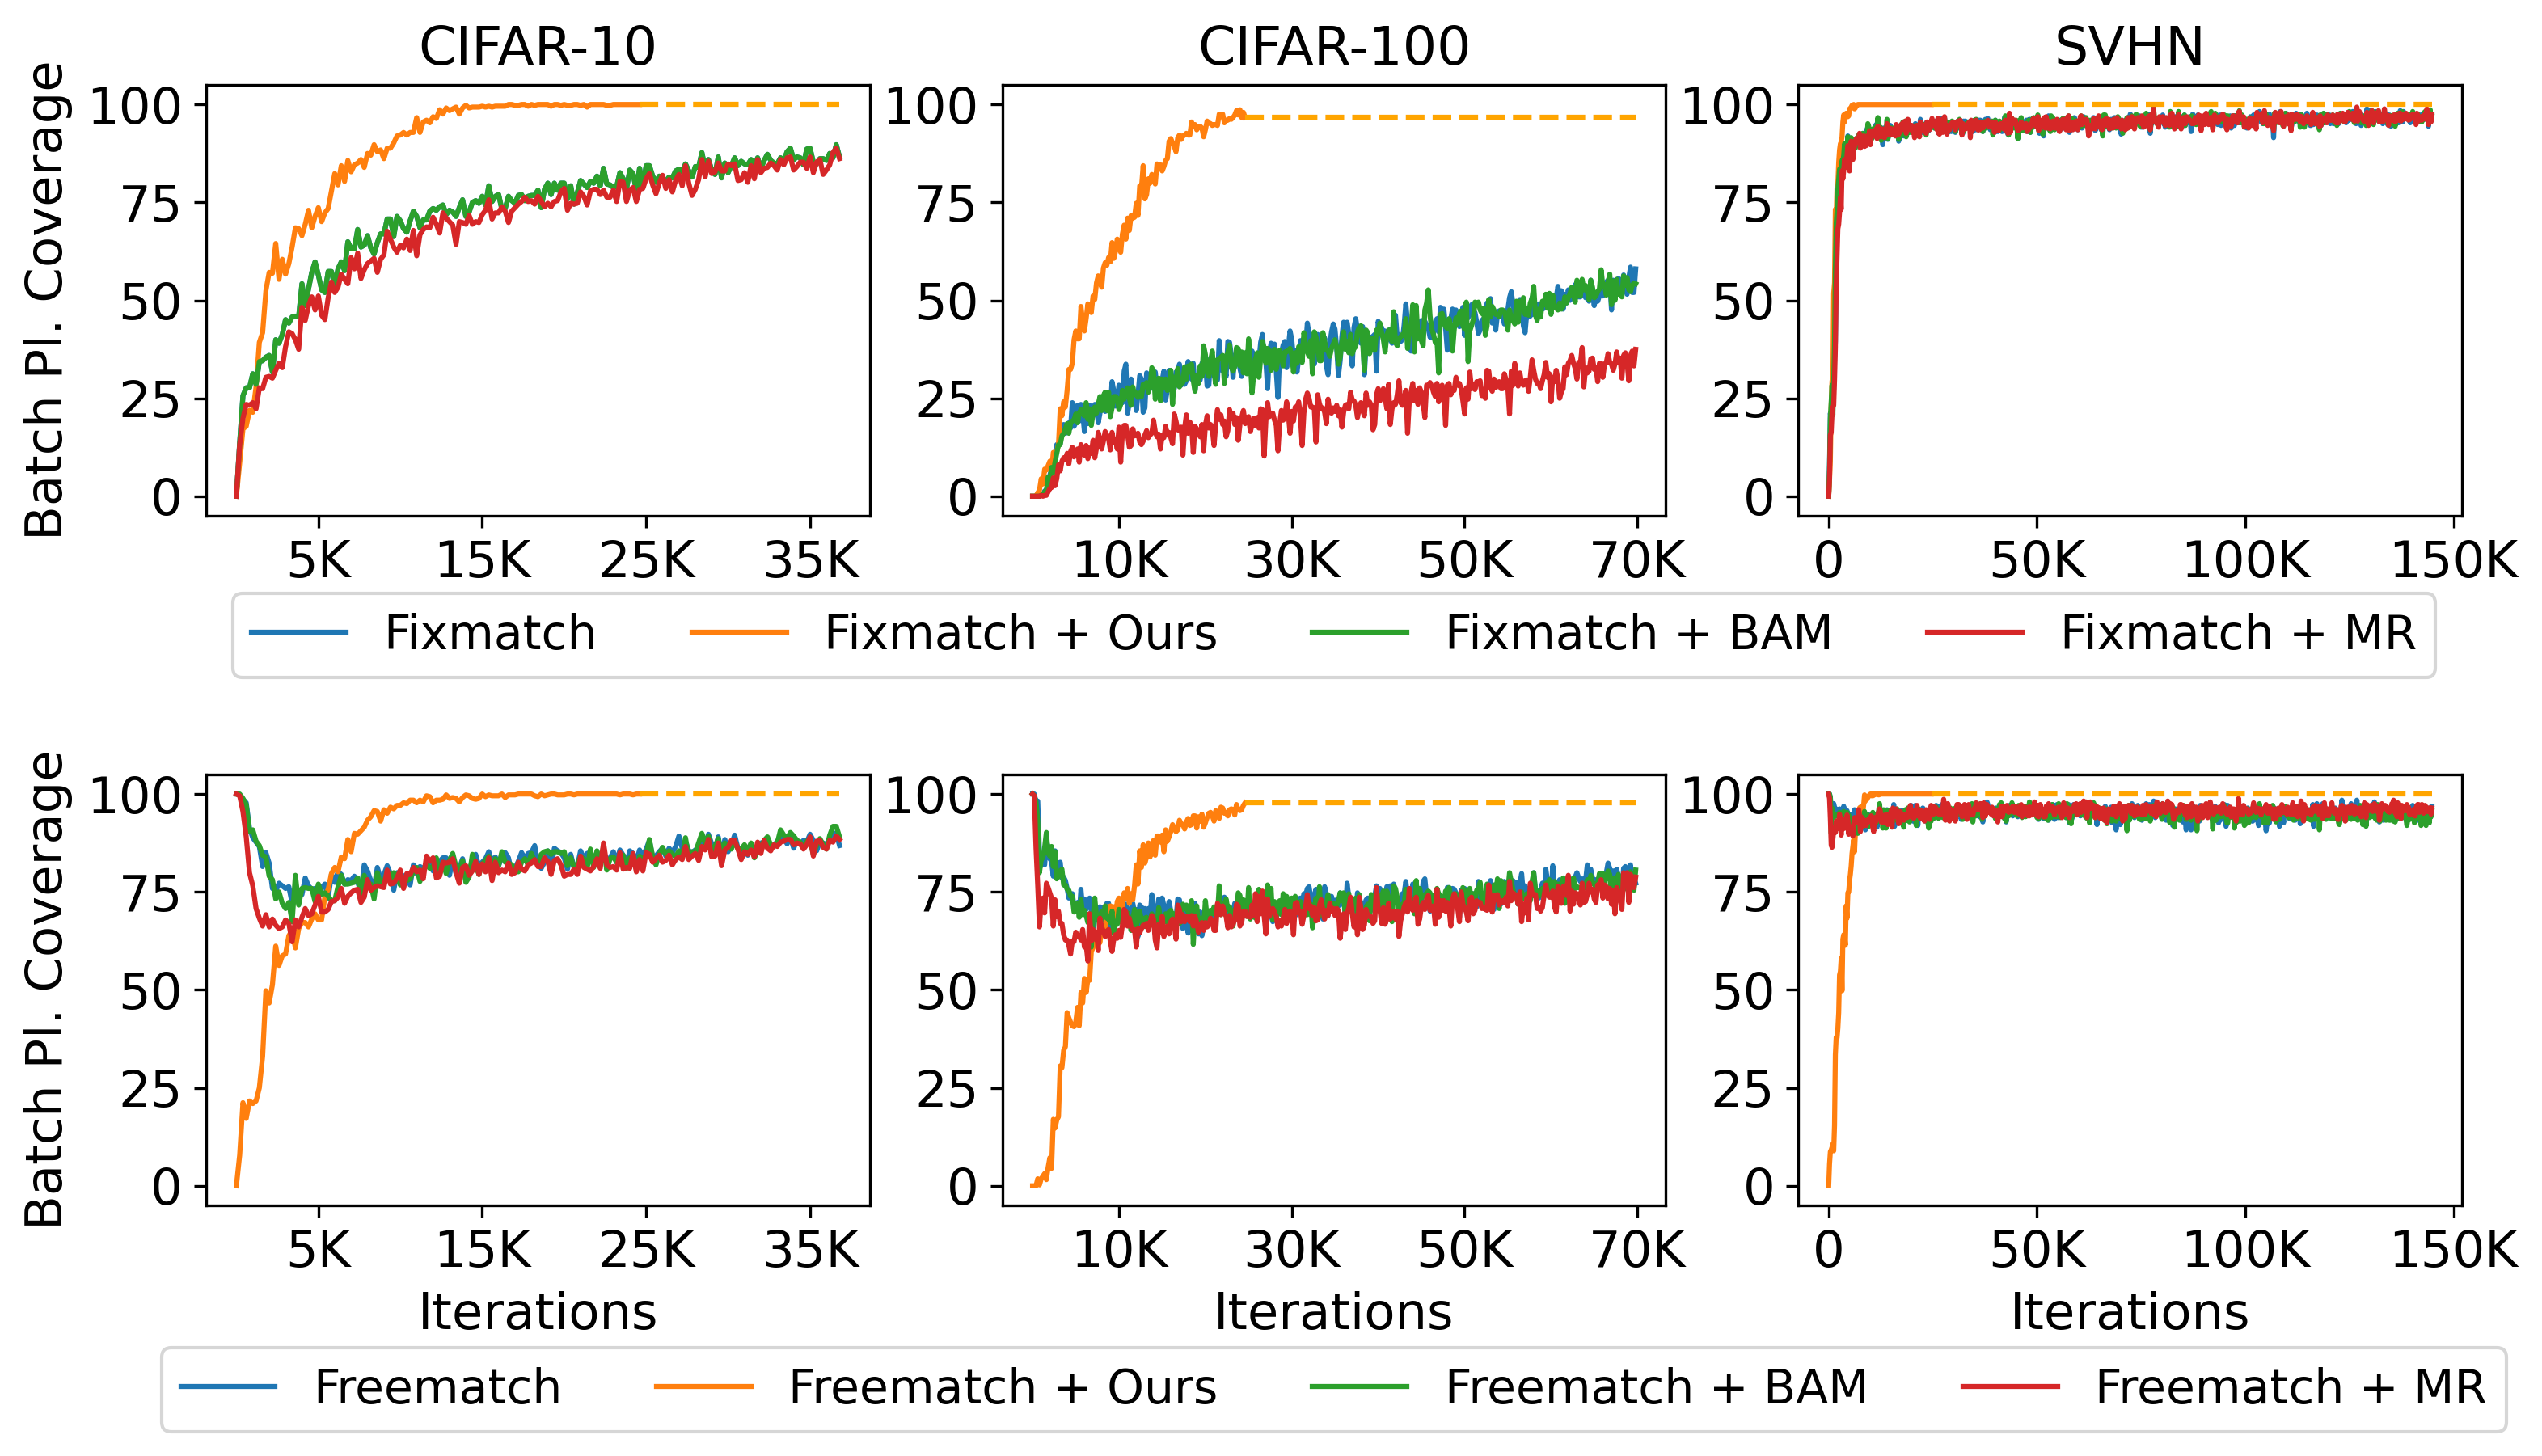

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

sns.lineplot(
    data=df_s[0][df_s[0].method.str.contains("fixmatch")],
    x="step",
    y="value",
    hue="method",
    ax=axes[0, 0],
)
sns.lineplot(
    data=df_s[0][df_s[0].method.str.contains("freematch")],
    x="step",
    y="value",
    hue="method",
    ax=axes[1, 0],
)

sns.lineplot(
    data=df_s[1][df_s[1].method.str.contains("fixmatch")],
    x="step",
    y="value",
    hue="method",
    ax=axes[0, 1],
)
sns.lineplot(
    data=df_s[1][df_s[1].method.str.contains("freematch")],
    x="step",
    y="value",
    hue="method",
    ax=axes[1, 1],
)

sns.lineplot(
    data=df_s[2][df_s[2].method.str.contains("fixmatch")],
    x="step",
    y="value",
    hue="method",
    ax=axes[0, 2],
)
sns.lineplot(
    data=df_s[2][df_s[2].method.str.contains("freematch")],
    x="step",
    y="value",
    hue="method",
    ax=axes[1, 2],
)

for ax in axes.flatten():
    ax.tick_params(axis="both", which="major", labelsize=16)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    if dataname == "top1":
        ax.set_ylabel("Top-1 Accuracy", fontsize=14)
    elif dataname == "batch_pl_acc":
        ax.set_ylabel("Batch Pl. Accuracy", fontsize=14)
    elif dataname == "batch_pl_cov":
        ax.set_ylabel("Batch Pl. Coverage", fontsize=14)

    ax.set_xlabel("Step", fontsize=14)
    ax.tick_params(axis="both", which="major", labelsize=12)
    ax.legend(title="")
    ax.set_ylim(-5, 105)
    ax.set_xlabel("Iterations")

    rename_map = {
        "fixmatch": "Fixmatch",
        "fixmatch-ours": "Fixmatch + Ours",
        "fixmatch-bam": "Fixmatch + BAM",
        "fixmatch-mr": "Fixmatch + MR",
        "freematch": "Freematch",
        "freematch-ours": "Freematch + Ours",
        "freematch-bam": "Freematch + BAM",
        "freematch-mr": "Freematch + MR",
    }

    handles, labels = ax.get_legend_handles_labels()
    new_labels = [rename_map.get(label, label) for label in labels]
    ax.legend(handles, new_labels)


rename_map = {
    "fixmatch": "Fixmatch",
    "fixmatch-ours": "Fixmatch + Ours",
    "fixmatch-bam": "Fixmatch + BAM",
    "fixmatch-mr": "Fixmatch + MR",
    "freematch": "Freematch",
    "freematch-ours": "Freematch + Ours",
    "freematch-bam": "Freematch + BAM",
    "freematch-mr": "Freematch + MR",
}

handles, labels = axes[0, 0].get_legend_handles_labels()
new_labels = [rename_map.get(label, label) for label in labels]
axes[0, 0].legend(
    handles,
    new_labels,
    loc="lower center",
    bbox_to_anchor=(1.7, -0.43),
    ncol=4,
    fontsize=14,
)

handles, labels = axes[1, 0].get_legend_handles_labels()
new_labels = [rename_map.get(label, label) for label in labels]
axes[1, 0].legend(
    handles,
    new_labels,
    loc="lower center",
    bbox_to_anchor=(1.7, -0.58),
    ncol=4,
    fontsize=14,
)
# Disable all other legends
for i in range(2):
    for j in range(3):
        if i == 1 and j == 0 or i == 0 and j == 0:
            continue
        axes[i, j].legend().set_visible(False)

for method_index, method in enumerate(["fixmatch-ours", "freematch-ours"]):
    for dataset_index in range(len(datasets)):
        line = lines[method][dataset_index]
        x1y1, x2y2 = line
        axes[method_index, dataset_index].plot(
            [x1y1[0], x2y2[0]], [x1y1[1], x1y1[1]], color="orange", linestyle="dashed"
        )

axes[0, 0].set_title("CIFAR-10", fontsize=16)
axes[0, 1].set_title("CIFAR-100", fontsize=16)
axes[0, 2].set_title("SVHN", fontsize=16)

xticks = [10000 * i for i in range(1, 8)][::2]
xtick_labels = [f"{i}0K" for i in range(1, 8)][::2]

axes[0, 1].set_xticks(xticks)
axes[0, 1].set_xticklabels(xtick_labels)
axes[1, 1].set_xticks(xticks)
axes[1, 1].set_xticklabels(xtick_labels)

xticks = [5000 * i for i in range(1, 8)][::2]
xtick_labels = [f"{i * 5}K" for i in range(1, 8)][::2]

axes[0, 0].set_xticks(xticks)
axes[0, 0].set_xticklabels(xtick_labels)
axes[1, 0].set_xticks(xticks)
axes[1, 0].set_xticklabels(xtick_labels)

xticks = [0, 50000, 100000, 150000]
xtick_labels = ["0", "50K", "100K", "150K"]
axes[0, 2].set_xticks(xticks)
axes[0, 2].set_xticklabels(xtick_labels)
axes[1, 2].set_xticks(xticks)
axes[1, 2].set_xticklabels(xtick_labels)

# for i, ax in enumerate(axes.flatten()):
#     # ch = chr(ord("a") + i)
#     # ax.set_title(f"({ch})", y=-0.38, fontsize=14)

axes[0, 0].set_title("CIFAR-10", fontsize=16)
axes[0, 1].set_title("CIFAR-100", fontsize=16)
axes[0, 2].set_title("SVHN", fontsize=16)

fig.subplots_adjust(hspace=0.6)

axes[0, 1].set_ylabel("")
axes[0, 2].set_ylabel("")
axes[1, 1].set_ylabel("")
axes[1, 2].set_ylabel("")
axes[0, 0].set_xlabel("")
axes[0, 1].set_xlabel("")
axes[0, 2].set_xlabel("")


for ax in axes.flatten():
    ax.tick_params(axis="both", which="major", labelsize=15)
    ax.xaxis.label.set_fontsize(15)
    ax.yaxis.label.set_fontsize(15)
    ax.set_yticks([0, 25, 50, 75, 100])

# plt.tight_layout()
plt.savefig(f"{dataname}_accuracy_main.pdf", bbox_inches="tight")
plt.show()